In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data

import mpld3

C:\Users\devyn\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [149]:
dts = ddm.genLogDist(1,2998,400)

In [340]:
Sample2 = ['allResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames', 'allResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames','allResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames','allResults_0.02mgmlDNA_Buffer_99fps_10exp']
Sample = ['allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp'] 

In [4]:
# different ROIs and the video number, change samNumber based upon the number of videos taken for the condition
samNumber = ['1', '2']
#newtaus = np.zeros([len(samNumber),31])
#newtaustds = np.zeros([len(samNumber),31])

In [5]:
Round2_Results = {}

In [345]:
Ana_data.keys()

['theory_valpha_top768',
 'theory_valpha_top0',
 'theory_falpha_top384',
 'fitparams_valpha_top256',
 'chi2_valpha_top512',
 'chi2_falpha_top0',
 'chi2_valpha_top384',
 'fitparams_falpha_bottom384',
 'chi2_valpha_bottom768',
 'theory_falpha_top640',
 'theory_valpha_top640',
 'fitparams_valpha_top0',
 'chi2_falpha_bottom128',
 'chi2_valpha_bottom0',
 'chi2_valpha_top0',
 'fitparams_valpha_top384',
 'fitparams_valpha_bottom0',
 'fitparams_falpha_bottom640',
 'chi2_falpha_bottom512',
 'chi2_valpha_bottom512',
 'theory_valpha_bottom768',
 'fitparams_falpha_top768',
 'theory_valpha_bottom512',
 'fitparams_valpha_bottom896',
 'fitparams_falpha_top640',
 'chi2_valpha_bottom896',
 'fitparams_falpha_bottom896',
 'fitparams_valpha_bottom256',
 'fitparams_falpha_top256',
 'fitparams_valpha_top512',
 'chi2_falpha_top512',
 'fitparams_valpha_bottom640',
 'chi2_falpha_bottom768',
 'fitparams_falpha_top896',
 'chi2_valpha_top256',
 'theory_falpha_bottom256',
 'fitparams_valpha_bottom128',
 'fitparams

(0.9, 15)

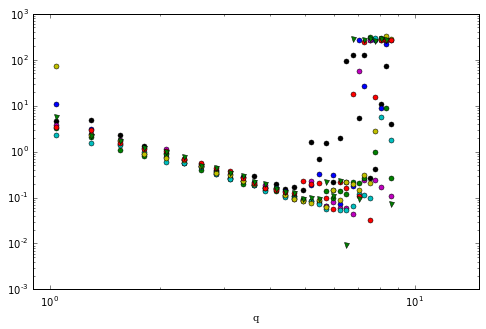

In [9]:
%matplotlib inline
mpld3.enable_notebook()
V = ['top', 'bottom']
z = 0

ROI = ['0', '128', '256', '384','512', '640','768','896']
#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([len(ROI),63]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
#fitparams = np.zeros([63,7])
for i in range(len(ROI)):
    fitparams = Ana_data['fitparams_falpha_'+V[z]+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]

fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
ax.set_xlabel("q", fontdict=font_plt_ax)

nt = np.zeros([len(ROI),31])
cols = ['ko','bo','mo','go','co','yo','ro','gv','bv','mv']
for i in range(len(ROI)):
    nt[i] = ddm.newt(tau[i,2:-30], alph[i,2:-30])
    ax.loglog(q[3:-30], ddm.newt(tau[i,2:-30],alph[i,2:-30]), cols[i], ms= 5.0)

ntav = np.mean(nt, axis=0)
ntstd = np.std(nt,axis=0)

#ax.loglog(q[3:-30], ntav, 'rv')
ax.set_xlim(0.9,15)

In [236]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
framerate = 29.0
px = 0.189
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
times = dts/framerate

In [353]:
samNumber = ['1', '2','4','6','7','8']
tauA = np.zeros([100,60])

In [467]:
ROI = ['256','384','512','640','768','896']
tauB = np.zeros([len(ROI),60])

In [468]:
num = 0
ss = 5

In [469]:
#Load in the allResults file  
data_dir = "E:\\2018-07-11_videos\\allResults\\"
data_file = Sample[num]+"_"+samNumber[ss]+".p"

Ana_data = pickle.load(open(data_dir + data_file, 'r'))

In [479]:
V = ['top', 'bottom']
z = 1

#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([len(ROI),63]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)

for i in range(len(ROI)):
    fitparams = Ana_data['fitparams_falpha_'+V[z]+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]

In [480]:
for i in range(len(ROI)):
    tauB[i] = ddm.newt(tau[i,2:-1],alph[i,2:-1])

In [491]:
tauA[57] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [258]:
this = that+1
that = this+len(ROI)

tauA[this:that,:] = tauB

In [290]:
tauA[29]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [492]:
taus = np.mean(tauA[:56,:], axis=0)
taustd = np.std(tauA[:56,:], axis=0)

array([[1.45101297e+02, 8.56624269e+00, 5.36833848e+01, ...,
        1.05391128e+02, 1.00000000e+02, 1.15278087e+02],
       [1.54220580e+02, 1.33634266e+01, 2.46528711e+01, ...,
        1.26922749e-06, 1.00000000e-06, 1.29830949e-06],
       [4.07672255e+01, 1.54336853e+02, 1.84495410e+01, ...,
        1.20000000e+04, 9.22060762e+01, 1.12136780e+02],
       ...,
       [1.28619744e+02, 1.72872485e+01, 2.53260642e+01, ...,
        3.05075294e-06, 1.25082338e-06, 3.40498951e+02],
       [3.23274270e+01, 7.69131437e+00, 3.06507561e+01, ...,
        1.17494166e+02, 2.73868327e+02, 1.72052422e-06],
       [1.33411264e+02, 1.94653862e+01, 1.22001159e+01, ...,
        7.95402838e+01, 5.07787089e+03, 1.61428823e+01]])

In [298]:
tt[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [142]:
taus[:-29].shape

(31L,)

<ErrorbarContainer object of 3 artists>

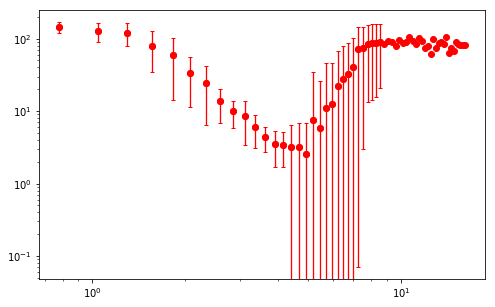

In [493]:
fig,ax = plt.subplots(figsize=(8,8/1.618))
ax.loglog(q[3:-1], taus, 'ro')
ax.errorbar(q[3:-30],taus[:-29],yerr=taustd[:-29],fmt='ro', elinewidth = 1.3, capsize=2)

In [494]:
Round2_Results['Actin_average_newtau'] = taus
Round2_Results['Actin_std_newtau'] = taustd

In [541]:
pickle.dump(Round2_Results, open('E:\\AllData_Results\\AllConditions_results.p','wb'))

In [495]:
Round2_Results.keys()

['Copoly_std_newtau',
 'Dilute_average_newtau',
 'Copoly_average_newtau',
 'MT_average_newtau',
 'MT_std_newtau',
 'Actin_average_newtau',
 'Actin_std_newtau',
 'Dilute_std_newtau']

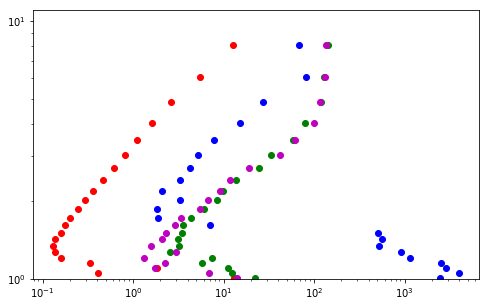

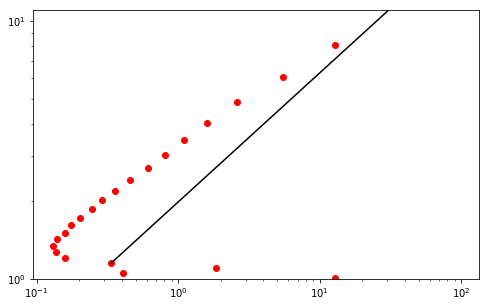

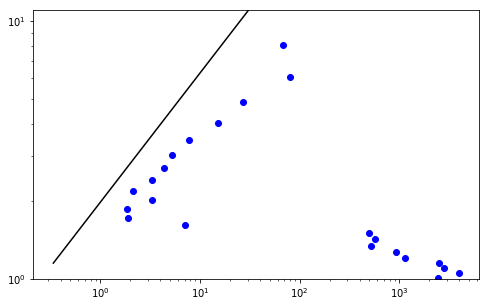

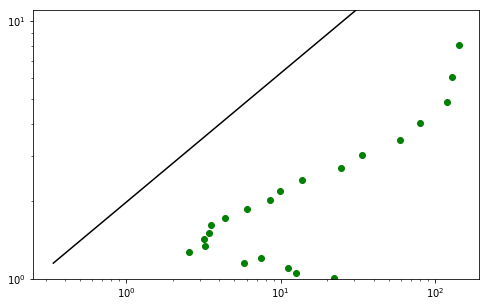

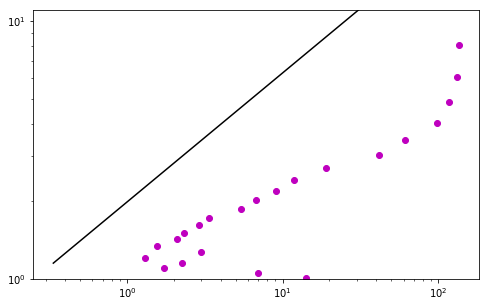

In [542]:
%matplotlib inline
mpld3.enable_notebook()

a = ['Dilute','MT','Actin','Copoly']
cc = ['ro', 'bo','go','mo']
diffusionCo = [0.309,0.039,0.0037,0.0031]


fig,ax = plt.subplots(figsize=(8,8/1.618))
for i in range(4):
    taus = Round2_Results[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
ax.set_ylim(1.0,11)
plt.savefig('E:\\AllData_Results\\AllConditions.svg')

    #ax.plot((1./diffusionCo[i]) * 1./(q[5:-42]**slope[i]), (2*np.pi)/q[5:-42],  '-k')


for i in range(4):
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    taus = Round2_Results[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
    ax.plot((1./0.1) * 1./(q[2:-42]**2.0), (2*np.pi)/q[2:-42],  '-k')
    ax.set_ylim(1.0,11)
    plt.savefig('E:\\AllData_Results\\'+a[i]+'Condition.svg')
    
    #ax.errorbar(q[3:-30],taus[:-29],yerr=taustd[:-29],fmt=cc[i], elinewidth = 1.3, capsize=2)

In [519]:
def roughEstimate (diffusionCo = 0.3, slope = 2.0):
    taus = Round2_Results[a[chg]+'_average_newtau']
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(q[3:-1], taus, 'ro')
    ax.plot(q[3:-1], (1./diffusionCo) * 1./(q[3:-1]**slope), '-k')
    ax.text(0.55,0.8,'D = %.4f' %diffusionCo, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

In [520]:
chg = 0
interact(roughEstimate, diffusionCo = (0.05,0.5,0.005), slope = (2.0,6.0,0.05), continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMywgZGVzY3JpcHRpb249dSdkaWZmdXNpb25DbycsIG1heD0wLjUsIG1pbj0wLjA1LCBzdGVwPTAuMDA1KSwgRmxvYXTigKY=


<function __main__.roughEstimate>

In [335]:
DC_roi[chg] = 0.24
a_roi[chg] = 2/2.4

In [314]:
Round2_Results['Diffusion1'+Sample2[num]+'_'+samNumber[0]] = DC_roi
Round2_Results['Diffusion2'+Sample2[num]+'_'+samNumber[1]] = DC_roi2
Round2_Results['alpha1'+Sample2[num]+'_'+samNumber[0]] = a_roi
Round2_Results['alpha2'+Sample2[num]+'_'+samNumber[1]] = a_roi2

In [273]:
Round2_Results['newTaus_ROIs'+Sample2[num]+'_'+samNumber[ss]] = ntav
Round2_Results['newTausSTD_ROIs'+Sample2[num]+'_'+samNumber[ss]] = ntstd

In [180]:
pickle.dump(Round2_Results, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_BufferConditions_withoutDiffCoeffs_all.p','wb'))

In [421]:
ntav.shape

(31L,)

In [217]:
R1 = np.zeros([len(ROI),2])
R2 = np.zeros([len(ROI),2])

In [177]:
Round2_Results.keys()

['newTaus_ROIsallResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_2',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_1',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_2',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_2',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_1',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_1',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_2',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_1',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_2',
 'newTaus_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_1',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_2',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_1',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_1',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_Buffer_99fps_10exp_2',
 'newTausSTD_

In [518]:
#ToKeep.keys()

After averaging each of the ROIs: average together the videos and get a diffusion coefficient for each video and then for the average

In [182]:
Condition = pickle.load(open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_BufferConditions_withoutDiffCoeffs_all.p','rb'))
Smps = ['allResults_0.02mgmlDNA_CoNetwork_29fps_34exp','allResults_0.02mgmlDNA_MTNetwork_29fps_34exp','allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp']

In [183]:
SS =['allResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_2', 
     'allResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_2',
     'allResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_2',
     'allResults_0.02mgmlDNA_Buffer_99fps_10exp_1','allResults_0.02mgmlDNA_Buffer_99fps_10exp_2']

In [317]:
DC_roi = np.zeros(len(ROI))
a_roi = np.zeros(len(ROI))
DC_roi2 = np.zeros(len(ROI))
a_roi2 = np.zeros(len(ROI))

In [185]:
#Condition.keys()

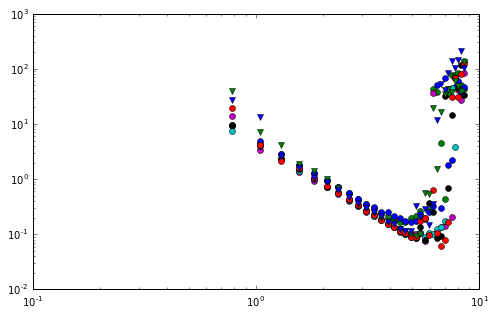

In [187]:
%matplotlib inline
mpld3.enable_notebook()

samNumber = ['1', '2']
ROI = ['0', '128', '256', '384','512', '640','768','896']
#['1_top','1_bottom','2_top','2_bottom','4_top','6_top','6_bottom','7_top','8_top','8_bottom']
theone = 0
tau = np.zeros([len(SS),31])
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca();
col = ['go', 'bo', 'mo', 'co','ko', 'ro','gv','bv','mv','cv','kv','rv']
for i in range(len(SS)):
    tau[i] = Condition['newTaus_ROIs'+SS[i]]
    std = Condition['newTausSTD_ROIs'+SS[i]]
    ax.loglog(q[3:-30],tau[i], col[i])
tauAVG = np.mean(tau,axis=0)
tauSTD = np.std(tau,axis=0)

In [188]:
DC = np.zeros(len(SS))
Sa = np.zeros(len(SS))

In [197]:
def DiffCoef (newtau_average, StretchExp, qrange, qmin, qmax):
    nt = newtau_average
    indx = (qrange>qmin) & (qrange<qmax)
    ds = (qrange[indx]**-2) / nt[indx]
    return ds.mean(), indx

def Diff_Fit(qrange, taurange, qmin, qmax, StExp, slope):
    step1 = DiffCoef(taurange, StExp, qrange, qmin, qmax)
    fit1 = (1./step1[0]) * 1./(qrange**slope)
    return fit1, step1[0], step1[1]

#Need to fix the function so the it will fit the data

#define a function to plot the results

def plot_results(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(qs, tauAVG, 'ro')
    #ax.errorbar(np.log(qs),np.log(tauAVG), yerr = tauSTD, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tauAVG, qmin, qmax, alph[2:-30], slope)
    ax.loglog(qs,fits[0],'-k')
    #ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    #ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

def roughEstimate (diffusionCo = 0.3, slope = 2.0):
    tau = Condition['newTaus_ROIs'+SS[chg]]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(q[3:-30], tau, 'ro')
    ax.plot(q[3:-42], (1./diffusionCo) * 1./(q[3:-42]**slope), '-k')
    ax.text(0.55,0.8,'D = %.4f' %diffusionCo, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)



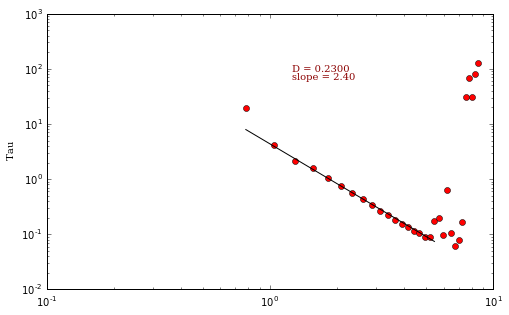

In [213]:
chg = 5
interact(roughEstimate, diffusionCo = (0.05,0.5,0.005), slope = (2.0,4.5,0.05), continuous_update=False)

In [214]:
DC[chg] = 0.3
Sa[chg] = 2/2.25 #this is alpha = 2/slope

In [215]:
AlSTD = np.std(Sa, axis=0)
DCstd = np.std(DC,axis=0)
Alavg = np.mean(Sa, axis=0)
DCavg = np.mean(DC,axis=0)
DCavg, DCstd, Alavg, AlSTD   

(0.25918749999999996,
 0.056354867524908626,
 0.87932983862678593,
 0.049956304206211076)

In [212]:
Sa

array([ 0.88888889,  0.85106383,  0.86956522,  0.86956522,  0.83333333,
        0.        ,  1.        ,  0.83333333])

In [101]:
ToKeep['DiffCoef_fromAVG_'+Smps[theone]] = DCavg
ToKeep['DiffCoefSTD_'+Smps[theone]] = DCstd
ToKeep['Alpha_fromAVG_'+Smps[theone]] = Alavg
ToKeep['AlphaSTD_'+Smps[theone]] = AlSTD
ToKeep['TauAverage_'+Smps[theone]] = tauAVG
ToKeep['TauSTD_'+Smps[theone]] = tauSTD

NameError: global name 'alph' is not defined

<function __main__.plot_results>

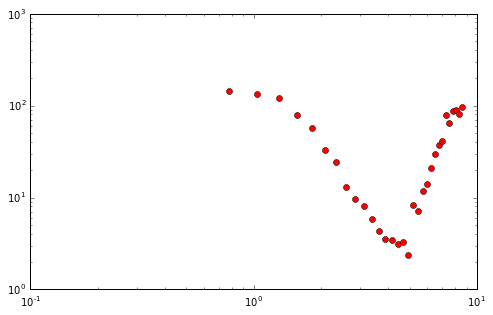

In [36]:
#fit to the high q region
interact(plot_results, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)

In [534]:
pickle.dump(ToKeep, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\ToKeep_maybeallbad.p', 'wb'))

In [527]:
DiffCoef_average1 = 0.016
DiffCoef_averageAlpha1 = 2/2.00

In [495]:
def plot_resultsall(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    tau = Condition['newTaus_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    std = Condition['newTausSTD_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.errorbar(np.log(qs),np.log(tau), yerr = std, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tau, qmin, qmax, alph[2:-30], slope)
    ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)
    ax.set_xlabel(" q", fontdict=font_plt_ax)
    ax.set_title(Smps[theone]+'_'+samNumber[chg], fontdict=font_plt_ax)

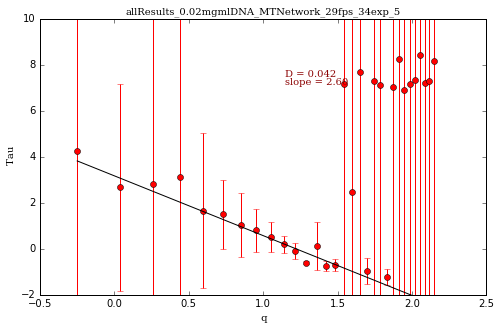

In [505]:
#fit for each video used in the average to get a standard deviation
chg = 4
interact(plot_resultsall, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)